<div style="text-align: center;">
    <h2>2221 ECE 2195 SEC1305 SPECIAL TOPICS: COMPUTERS</h2>
<h1 style="font-size: 250%;">Assignment #2</h1>
<h3>Total points: 120 </h3>
</div>

In [1]:
%matplotlib inline

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, recall_score, precision_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.datasets import load_breast_cancer, load_iris
from sklearn.neural_network import MLPClassifier

# <h3>  Problem #1. Classification </h3> 
 ### [20 points]
 
**Do not write a code for this part**

<h4> Problem #1-1</h4>  <br>
Assume we have K classes to be classified with one feature $(x)$. The prior probability of
class $k$ is $𝜋_{k} = 𝑃(𝑌 = 𝑘)$. Assume that the feature in class k has Gaussian distribution of
mean $μ_{k}$ and variance $σ^2 (𝒩(μ,𝜎^{2}))$.The variance is the same for all classes. 

<br>1. Prove that the Bayes’ classifier (that chooses class k with largest $𝑃(𝑌 = 𝑘|𝑥))$ is equivalent to assigning an observation to the class for which the discriminant function $𝛿_{k}(x)$ is
maximized, where 
\begin{array} \\
𝛿_{k}(x) = x\frac{\mu _{k}}{\sigma ^{2}}- \frac{\mu_{2}^{k}}{2\sigma ^{2}}+ log(\pi _{k})
\end{array}
<br>2. What is the name of this classifier? 

### Answer here




1. $p_x(k) = p(x|y = k)*p(y=k) = \pi_k * \frac{1}{\sqrt{2\pi}\sigma_k} * e^{-\frac{1}{2}\frac{(x-\mu_k)}{\sigma_k}^2}$

   $log(p_x(k)) = log \pi_k - log{\sqrt{2\pi}\sigma_k} - \frac{1}{2}\frac{(x-\mu_k)}{\sigma_k}^2$
   
   Since the $log{\sqrt{2\pi}\sigma_k}$ term does not depend on k, it isn't really necessary for the overall calculation and can be removed.
   
   $log(p_x(k)) = log \pi_k - \frac{1}{2\sigma^2} [x^2 - 2x\mu_k + u_k^2]$
   
   $log(p_x(k)) = log \pi_k - \frac{x^2}{2\sigma^2} + \frac{x\mu_k}{\sigma^2} - \frac{\mu_k^2}{2\sigma^2}$
   
   Since the $\frac{x^2}{2\sigma^2}$ term does not depend on k, it can also be removed. Also, the $log(p_x(k))$ can be reduced to $p_x(k)$ since it is a probability measure. 
   
   $p_x(k) = \frac{x\mu_k}{\sigma^2} - \frac{\mu_k^2}{2\sigma^2} + log \pi_k $
   
   

2. This is the LDA classifier.

<h4> Problem #1-2 </h4>

Extend **Problem #1-1** to include **p** features. With features from each class drawn from a
Gaussian distribution with mean vector $μ_{k}$ and covariance matrix $Σ_{k}$ (which is now
different for each class), please answer the following questions.
1. What is the discriminant function that maximizes **𝑃(𝑌 = 𝑘|𝑥)**. 
2. Is the relationship with the feature vector **x** linear?
3. What is this classifier?

### Answer here




1. $𝛿_{k}(x) = -\frac{1}{2}x^{T}Σ_{k}^{-1}x + x^{T}Σ_{k}^{-1}μ_{k} -\frac{1}{2}μ_{k}^{T}Σ_{k}^{-1}μ_{k} -\frac{1}{2}log|Σ_{k}| + log \pi_k$
2. No, the relationship with the feature vector is quadratic.
3. QDA classifier.

<h4> Problem #1-3</h4>

Explain the Bias-variance trade-off in choosing between LDA and QDA

### Answer here




LDA is a simpler estimator, which means that it has lower variance but higher bias (more likely to underfit). QDA is more complex, meaning it is more susceptible to high variance and overfitting.

#### <h3>  Problem #2. Regularization    </h3>
### [15 points]

<h4> Problem #2-1.Logistic Regression with Ridge Regularization</h4>

In this part, you should download and analyze the Wisconson **"breast_cancer"** dataset. <br>

1. Fit logistic regression model using ridge regularization with different values of  C = 0.1, 1, 5, 10, 50, 100, and 1000 (Note that C is the LogisticRegression function argument). For each value, report the estimated coefficients for the fitted model (do not just print summary, make a table with feature names and estimated coefficients)

2. What happens to the coefficients as you increase C?

3. What happens to the flexibility of the model as you increase C?

In [2]:
DataCancer=load_breast_cancer()

X = DataCancer.data
Y = DataCancer.target

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, random_state=0)

scaler = StandardScaler().fit(X_train)

X_train_t = scaler.transform(X_train)
X_test_t = scaler.transform(X_test)

# Your code here
C = [0.1, 1, 5, 10, 50, 100, 1000]
coefs = []
fnames = DataCancer.feature_names

for c in C:
    LogRegModel = LogisticRegression(penalty='l2', C=c, solver='lbfgs', max_iter=1000)
    LogRegModel.fit(X_train_t, Y_train)
    
    coefs.append(LogRegModel.coef_[0])

df = pd.DataFrame(coefs, index=C, columns=fnames)
print(df)

        mean radius  mean texture  mean perimeter  mean area  mean smoothness  \
0.1       -0.351363     -0.399586       -0.344433  -0.334798        -0.182925   
1.0       -0.297929     -0.580564       -0.310941  -0.377129        -0.119842   
5.0        0.070577     -0.732883       -0.082704  -0.139309         0.108164   
10.0       0.359470     -0.802108        0.045682   0.105858         0.200426   
50.0       1.585355     -0.851347        0.353257   0.965456         0.384810   
100.0      2.521606     -0.869261        0.545690   1.488781         0.502454   
1000.0     7.360870     -1.142645        1.595153   4.004984         1.799400   

        mean compactness  mean concavity  mean concave points  mean symmetry  \
0.1            -0.036636       -0.312717            -0.417250      -0.204699   
1.0             0.428555       -0.711311            -0.853712      -0.466882   
5.0             1.270624       -1.443909            -1.412200      -0.739543   
10.0            2.021216       

2. The coefficients increase in magnitude as C is increased.
3. It increases the flexibility of the model because there is less regularization. As the coefficients go to 0 (C goes to 0), the model becomes more simple and less flexible.

### <h3>  Problem #3. Logistic Regression and Unbalanced Datasets  </h3> 
### [20 points]


We fit a logistic regression model to predict the probability that an individual will default on his/her credit card balance. We used the total balance (single feature) to fit the model and got the results shown in the table below.

<h4> Problem #3-1. </h4> Prediciton with Logistic regression <br>

|Table|Coefficient|Std.error|Z-statistic|P-Value|
|:--:|:--:|:--:|:--:|:--:|
|Intercept|-10.6513|0.3612|-29.5|<0.0001|
|balance|0.0055|0.002|24.9|<0.0001|

- What is the parametric model used in logistic regression? Please write down the formula.
- What is the class label of an individual with a balance equals to 15,000 dollar? What is the class label of an individual with balance equals to 800 dollar? (Write a python function which takes two inputs (feature, model_parameters), and returns the class labels for the data). Default is class 1 and non-default is class 0.

### Answer here




* $f(X) = \frac{e^{-10.6513 + 0.0055 * balance}}{1 + e^{-10.6513 + 0.0055 * balance}}$

In [3]:
def predict_log_reg(feature, model_parameters):
    b0 = model_parameters[0]
    b1 = model_parameters[1]
    
    term = np.e ** (b0 + b1*feature)
    res = term / (1 + term)
    
    if res >= 0.5:
        return 1
    else:
        return 0
    
params = [-10.6513, 0.0055]
features = [15000, 800]

for feature in features:
    label = predict_log_reg(feature, params)
    
    if label == 1:
        print(f'For balance = {feature}, individual is predicted to default')
    else:
        print(f'For balance = {feature}, individual is predicted to not default')

For balance = 15000, individual is predicted to default
For balance = 800, individual is predicted to not default


<h4> Problem #3-2. </h4>

a) The coefficients of logistic regression are obtained by maximizing the likelihood function

\begin{array} \\
l(\beta) = \prod_{i:y_{i}=1} P(y_{i} = 1|x)\prod_{i{}':y_{{i}'}=0} (1-P(y_{{i}'} = 1|x))
\end{array}
Please show that maximizing the
likelihood function is equivalent to minimizing the cross entropy


Let $n$ be the number training examples. 

b) Is there a closed-form solution for coefficients?

c) Assume we use gradient method (gradient ascent or descent) to find the coefficients. Derive the gradient, and describe how the optimal coefficients can be obtained.

### Answer here




a) $log(l(\beta)) = Σ_{i:y:=1}log(P(y_{i} = 1|x)) + Σ_{i' : y_{i'} = 0}log(1-P(y_{i} = 1|x))$

   $log(l(\beta)) = Σ_{i}[y_{i} log(P(y_{i} = 1|x)) +(1 - y_{i}) log (1 - P(y_{i} = 1 | x))]$
   
   Maximizing $log(l(\beta))$ is the same as minimizing $-log(l(\beta))$, which is the above result multiplied by -1. The above result is also the cross-entropy function.

b) There is no closed-form solution for the coefficients because the sigmoid function is nonlinear.

c) Gradient ascent: $\beta_{j} := \beta_{j} + \lambda \frac{dJ(\beta)}{d(\beta_{j})}$

   $ J(\beta) = Σ[y_{i} log(f(x_{i})) + (1-y_{i})log(1-f(x_{i}))]$
   
   $ \frac{dJ(\beta)}{d(\beta_{j})} = Σ[\frac{y_{i}}{f(x_{i})} \frac{d}{d\beta_{j}} f(x_{i}) - \frac{1-y_{i}}{1-f(x_{i})} \frac{d}{d\beta_{j}} (1-f(x_{i}))]$
   
   $ = \frac{y_{i}(1 - f(x_{i})) - (1 - y_{i})(f(x_{i}))}{f(x_{i})(1-f(x_{i}))} * f(x_{i})(1-f(x_{i}))x_{ij}$
   
   $ = (y_{i} - f(x_{i}))x_{ij}$
   
   The optimal coefficients can be obtained by going through the gradient ascent/descent process: initializing the beta terms, finding the derivative over each training example, and updating the weights accordingly. This continues until a local minima is reached or a set number of iterations have been completed.

<h4> Problem #3-3</h4> <br>
In a fraud detection system, a QDA classifier’s confusion matrix is found to be:

|        |Predicted Class - Not fraud| Predicted Class - fraud|
|:--:|:--:|:--:|
|Actual class – Not fraud|1200|25|
|Actual class – fraud|30|7|

- Is dataset balanced? Why?
- Evaluate the overall error rate <br>
- Evaluate the precision and the recall <br>


### Answer here




1. The dataset is not balanced because there are many more cases of not fraud than fraud.
2. Overall error rate is $\frac{25 + 30}{1200 + 30 + 25 + 7} = 0.0436$.
3. Precision is $\frac{7}{7 + 25} = 0.21875$. 

   Recall is $\frac{7}{7 + 30} = 0.1891$.

### Problem #4. SVM, Decision Trees, MLP Classification
### [20 points]

In this problem, you will use different classification methods, SVM, KNN, Decision Tree and MLP; and find their accuracies using the test data. 
We will also use the Wisconson **"breast_cancer"** dataset.
In all of the following subparts, use **random_state=0** when you split the dataset into train and test and **standardize** the data.

In [4]:
DataCancer = load_breast_cancer()

X = DataCancer.data
Y = DataCancer.target

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, random_state=0)

scaler = StandardScaler().fit(X_train)

X_train_t = scaler.transform(X_train)
X_test_t = scaler.transform(X_test)

<h4> Problem #4-1.  Classification with SVM </h4>

- How does the Radial Basis Function Kernel in SVM measure the similarity between a test point and a training example?
- Fit an SVM classifier with a radial basis function kernel, with gamma =0.1, and regularization parameter C set to 10. Use the classifier to predict class labels for the test data. 
- Calculate the accuracy and confusion matrix on the test data.

### Answer here




The RBF kernel computes the squared Euclidean distance between the observation point and training point. 

In [5]:
svm = SVC(kernel='rbf', gamma=0.1, C=10)
svm.fit(X_train_t, Y_train)

preds = svm.predict(X_test_t)
acc = svm.score(X_test_t, Y_test)

print('Accuracy is %.4f.' % acc)
print(confusion_matrix(Y_test, preds))

Accuracy is 0.9650.
[[52  1]
 [ 4 86]]


<h4> Problem #4-2.  Classification with Decisin Tree (DT) </h4>

- In this part, use DT classification method on the training data. Set the maximum depth of the tree to five. Then use the classifier to predict class labels for the test data. Calculate the accuracy and confusion matrix on the test data.
- Use Adaboost to combine four decision trees each of max_depth of five. Use random_state=0 in adaboost. Find the test accuracy. 

In [6]:
tree = DecisionTreeClassifier(max_depth=5, criterion='gini', random_state=0)
tree.fit(X_train_t, Y_train)

preds = tree.predict(X_test_t)
acc = tree.score(X_test_t, Y_test)

print('Accuracy is %.4f.' % acc)
print(confusion_matrix(Y_test, preds))

Accuracy is 0.8951.
[[51  2]
 [13 77]]


In [7]:
adaboost = AdaBoostClassifier(n_estimators=4, random_state=0,
                              base_estimator=DecisionTreeClassifier(max_depth=5, random_state=0))
adaboost.fit(X_train_t, Y_train)
preds = adaboost.predict(X_test_t)
acc = adaboost.score(X_test_t, Y_test)

print('Accuracy is %.4f.' % acc)
print(confusion_matrix(Y_test, preds))

Accuracy is 0.9091.
[[50  3]
 [10 80]]


<h4> Problem #4-3 </h4>

Follow steps to answer questions to build a neural network using MLPClassifier from sklearn.neural_network. 
- Build a model that has two hidden layers, the first layer has 10 neurons and second layer has 5 neurons. 
- Use 'relu' activation function, and set the regularization parameter alpha=0.5. 
- Set max_iter=1000; Set the random_state=0.
- Use stochastic gradient descent (sgd) to solve the optimization problem.
- Report accuracy, confusion matrix, precision, and recall. 

In [8]:
MLP = MLPClassifier(solver='sgd', activation='relu', random_state=0, max_iter=1000, hidden_layer_sizes=[10,5], alpha=0.5)
MLP.fit(X_train_t, Y_train)

preds = MLP.predict(X_test_t)
acc = MLP.score(X_test_t, Y_test)

print(confusion_matrix(Y_test, preds))
print('Accuracy is %.4f.' % acc)
print('Precision is %.4f.' % precision_score(Y_test, preds))
print('Recall is %.4f.' % recall_score(Y_test, preds))

[[52  1]
 [ 2 88]]
Accuracy is 0.9790.
Precision is 0.9888.
Recall is 0.9778.


<h4> Problem #4-4 </h4>


Use the same setting as **problem 4-3**, but instead of using two hidden layers, use three hidden layers with 10, 8, 5 hidden neurons respectively.
- Find accuracy, precision, recall and confusion matrix. 
- Comment on the result comparing 4-3 and 4-4. 

### Answer here




The accuracy is about the same with the three-hidden-layer model (slightly worse, even). This shows that the data has reached a point of diminishing returns, where it is no longer useful to add more layers to an MLP classifier.

In [9]:
MLP = MLPClassifier(solver='sgd', activation='relu', random_state=0, max_iter=1000, hidden_layer_sizes=[10,8,5], alpha=0.5)
MLP.fit(X_train_t, Y_train)

preds = MLP.predict(X_test_t)
acc = MLP.score(X_test_t, Y_test)

print(confusion_matrix(Y_test, preds))
print('Accuracy is %.4f.' % acc)
print('Precision is %.4f.' % precision_score(Y_test, preds))
print('Recall is %.4f.' % recall_score(Y_test, preds))

[[49  4]
 [ 3 87]]
Accuracy is 0.9510.
Precision is 0.9560.
Recall is 0.9667.


### Problem #5. Back propagation in Neural Networks
### [25 points]

In this problem, you should **not** use existing neural network libraries. You should build your own neural network to learn the XOR function. The network should have one hidden layer of three units.  You need to implement the network and have a function to fit the network (including implementing the backpropagation) and a function to predict the input after training. 

We need to train the network with multiple epochs on the XOR data (2 inputs X1 and X2, and one output Y). Please use sigmoid activation function at each layer (hidden and output layer). Initialize the weights randomly using a uniform distribution in the range [-1,1]. Set the learning rate to 0.1 (or less), and try number of epochs 200 (or more). 

Make reasonable assumptions as needed, but state them explicitly. Also, please comment your code to show your understanding of the algorithm.


1. Plot the training mean squared error vs. epoch number

2. After training, show the prediction of the 4 possible inputs to the XOR. For the prediction, the ouput of the last layer can be 0 if output is less than 0.5 and 1 otherwise. 

XOR data:

(X1, X2, Y):

 (0 , 0 , 0)
 
 (0 , 1 , 1)
 
 (1 , 0,  1)
 
 (1 , 1,  0)

In [10]:
def forward(x1, x2):
    def sigmoid(x):
      return 1 / (1 + np.e ** (-x))

    sigmoid_v = np.vectorize(sigmoid)
    
    inp = np.array([x1, x2])
    
    HL_res = sigmoid_v(np.matmul(w1, inp) - np.transpose(b1)) 

    pred = sigmoid_v(np.matmul(w2, np.transpose(HL_res)) - b2)
    
    return HL_res, pred 

In [11]:
def backpropagate(x1, x2, HL_res, pred, y):
    # HL_res is the intermediate result of the hidden layer neurons
    y3 = HL_res[0][0]
    y4 = HL_res[0][1]
    y5 = HL_res[0][2]
    
    w36 = w2[0][0]
    w46 = w2[0][1]
    w56 = w2[0][2]
    
    # Get gradient for output neuron
    del_6 = pred * (1 - pred) * (y - pred)
    
    # Get gradient for hidden layer neurons  
    del_3 = y3 * (1 - y3) * del_6 * w36
    del_4 = y4 * (1 - y4) * del_6 * w46
    del_5 = y5 * (1 - y5) * del_6 * w56
    
    # Update weights for hidden layer neurons
    w2[0][0] += lr * y3 * del_6
    w2[0][1] += lr * y4 * del_6
    w2[0][2] += lr * y5 * del_6
    
    # Bias term for output layer neuron
    b2[0][0] += -1 * lr * del_6
    
    # Update weights for input layer neurons
    w1[0][0] += lr * del_3 * x1
    w1[0][1] += lr * del_3 * x2
    
    w1[1][0] += lr * del_4 * x1
    w1[1][1] += lr * del_4 * x2
    
    w1[2][0] += lr * del_5 * x1
    w1[2][1] += lr * del_5 * x2
    
    # Bias terms for hidden layer neurons
    b1[0][0] += -1 * lr * del_3
    b1[1][0] += -1 * lr * del_4
    b1[2][0] += -1 * lr * del_5

In [12]:
# Initialize training data and hyperparameters
X_train = [[0, 0, 1, 1], [0, 1, 0, 1]]
Y_train = [0, 1, 1, 0]

IL = 2
HL = 3
OL = 1

lr = 0.1
epochs = 10000

# Initialize weights and biases randomly, drawing from uniform distribution over [-1, 1]
w1 = np.random.uniform(-1,1, (IL * HL)).reshape((HL, IL))
w2 = np.random.uniform(-1,1, (HL * OL)).reshape((OL, HL))

b1 = np.random.uniform(-1,1, (HL)).reshape((HL, 1))
b2 = np.random.uniform(-1,1, (OL * 1)).reshape((OL, 1))
 
epoch_num = []
mse = []

for epoch in range(0, epochs):
    epoch_num.append(epoch)
    curr_mse = 0
    
    for x1, x2, y in zip(X_train[0], X_train[1], Y_train):
        HL_res, pred = forward(x1, x2)
        err = (y - pred) ** 2
        curr_mse += err
        
        backpropagate(x1, x2, HL_res, pred, y)
        
    curr_mse /= len(X_train[0])
    mse.append(curr_mse)

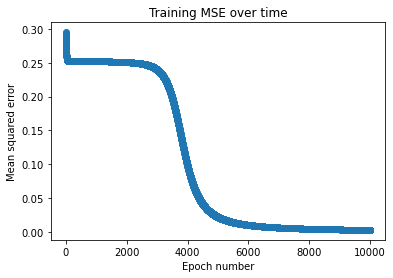

In [13]:
# Plot mean squared error vs. epoch number
plt.scatter(epoch_num, mse)
plt.xlabel('Epoch number')
plt.ylabel('Mean squared error')
plt.title('Training MSE over time')
plt.show()

In [14]:
def predict():
    X_test = [[0, 0, 1, 1], [0, 1, 0, 1]]
    for x1, x2 in zip(X_test[0], X_test[1]):
        res1, pred = forward(x1, x2)
        if pred > 0.5:
            pred = 1
        else:
            pred = 0
        print(f'X1 = {x1}. X2 = {x2}. Prediction = {pred}.')
        
predict()

X1 = 0. X2 = 0. Prediction = 0.
X1 = 0. X2 = 1. Prediction = 1.
X1 = 1. X2 = 0. Prediction = 1.
X1 = 1. X2 = 1. Prediction = 0.


### Problem #6. Neural Network
### [20 points]
Apply neural networks (multilayer perceptron) to classify the Iris species, and build a model that has two hidden layers, the first layer has 10 neurons and second layer has 5 neurons. Use 'tanh' activation function, and set the regularization parameter alpha=0.5. Scale the feautures with MinMaxScaler. Try the following settings (a)-(c) and report the accuracy, then comment on the results. 

**Note:** please make any reasonable assumptions as needed, but state them explicitly. Also, please comment your code to show your understanding of the algorithm.

a) Use gradient descent to solve the optimization  problem, and choose random_state=0 (which corresponds to a particular initialization of weight values), and set max_iter=5000. Print the test accuracy.
   
b) Repeat (a) above but with a model that uses random_state=10 to initialize the weights. Print the test accuracy.
    
    
c) Repeat (b) but with model that use L-BFGS (a numerical quasi-Newton method of optimization) instead of stochastic gradient descent to find the weights. Print the test accuracy
    
d) Comment on results



In [15]:
IrisData = load_iris()

X = IrisData.data
Y = IrisData.target

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, random_state=0)

scaler = MinMaxScaler().fit(X_train)

X_train_t = scaler.transform(X_train)
X_test_t = scaler.transform(X_test)

In [16]:
MLP = MLPClassifier(solver='sgd', activation='tanh', random_state=0, max_iter=5000, hidden_layer_sizes=[10,5], alpha=0.5)
MLP.fit(X_train_t, Y_train)

preds = MLP.predict(X_test_t)
acc = MLP.score(X_test_t, Y_test)

print('Accuracy is %.4f.' % acc)

Accuracy is 0.9474.


In [17]:
MLP = MLPClassifier(solver='sgd', activation='tanh', random_state=10, max_iter=5000, hidden_layer_sizes=[10,5], alpha=0.5)
MLP.fit(X_train_t, Y_train)

preds = MLP.predict(X_test_t)
acc = MLP.score(X_test_t, Y_test)

print('Accuracy is %.4f.' % acc)

Accuracy is 0.9211.


In [18]:
MLP = MLPClassifier(solver='lbfgs', activation='tanh', random_state=10, max_iter=5000, hidden_layer_sizes=[10,5], alpha=0.5)
MLP.fit(X_train_t, Y_train)

preds = MLP.predict(X_test_t)
acc = MLP.score(X_test_t, Y_test)

print('Accuracy is %.4f.' % acc)

Accuracy is 0.9737.


The difference between A and B seems to be relatively small since it is just a difference of how the random weights are initialized. This likely means that, in part B, the gradient descent is finding a local minimum instead of the global minimum. A is not necessarily the global minimum, but it is more of a minimum than the one found in Part B. Using the L-BFGS solver in Part C has improved the overall accuracy, meaning that it is closer to the global minimum of the function.